In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

# Variables aleatorias y sus distribuciones

Una **variable aleatoria** $X$ es un objeto que puede ser utilizado para generar números de manera que se puedan hacer afirmaciones probabilísticas válidas, por ejemplo:

\begin{align}
P(X > 0) & = 0.5 \\
P(-1 < X < 1) & = 0.25 \\
P(X < 0) & = 0 \\
P(X > 1 \mid X > 0) & = 0.5 
\end{align}

Todas son afirmaciones probabilísticas de una variable aleatoria.

Desde el punto de vista de la programación, una variable aleatoria es un tipo de objeto que implementa un único método público: `sample`.

### POO!

In [5]:
class RandomVariable:
    
    def __init__(self, parameters):
        self._parameters = parameters
        
    def sample(self):
        '''Obtener una muestra aleatoria para la variable.'''
        return algorithm_for_sampling_from_this_variable()

Desafortunadamente no siempre se le llama `sample`, a este método (scipy)

## Distribuciones de probabilidad

Si una variable aleatoria es un canal para generar números que siguen alguna ley de probabilidad, necesitamos algún mecanismo para describir este patrón de probabilidades.

El patrón de probabilidades de una variable aleatoria se denomina su **distribución**, y hay algunos parámetros matemáticos que se utilizan para describirlas.  El parámetro adecuado depende de si la variable aleatoria genera valores **discretos** o **continuos**.

  - Los valores discretos suelen ser números enteros, y el caso más común es un recuento de algo.
  - Los valores continuos pueden tomar cualquiera de un rango de valores (es decir, cualquier [número real](https://en.wikipedia.org/wiki/Real_number) en un rango).  Estas variables aleatorias suelen representar una medida de algo.

### Caso discreto: Distribución y densidad

Una afirmación probabilística muy general que podemos hacer sobre una variable aleatoria (que se aplica tanto al caso discreto como al continuo) es calcular la **función**

$$ F_X(t) = P(X \leq t) $$

que se denomina **[distribución acumulada](https://en.wikipedia.org/wiki/Cumulative_distribution_function)** o simplemente **función de distribución** (o **CDF** por sus siglas en inglés).  Esta función dice todo lo que podemos esperar decir sobre la distribución de una variable aleatoria.

En el caso de que nuestra variable aleatoria arroje valores **discretos**, podemos enumerar aquellos valores que son menores que cualquier número $t$.

$$ \text{Posibles valores de salida de X que son} \leq t = \ {x_1, x_2, \ldots, x_k\} $$

Cada uno de estos valores tiene alguna probabilidad de ocurrir:

$$ P(X = x_i) = \text{algún número entre cero y uno} $$

En conjunto, estas probabilidades forman la **[función de masa de probabilidad](https://en.wikipedia.org/wiki/Probability_mass_function)** de una variable aleatoria discreta.

> Dado un posible valor de salida de $X$, la función de masa de probabilidad muestra la probabilidad de que ese valor ocurra.

$$ f_X(t) = P(X = t) $$

Obsérvese que $f_X$ da como resultado *cero* para la mayoría de las entradas, ya que sólo hay un conjunto discreto de posibilidades de $X$.

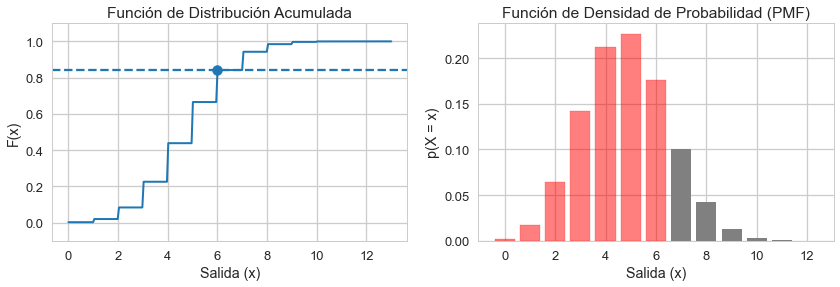

In [6]:
binomial = stats.binom(n=12, p=0.4) 
# Distribución binomial

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, binomial.cdf(x), linewidth=2)
ax[0].scatter(6, binomial.cdf(6), s=100) # crear un punto
ax[0].axhline(y=binomial.cdf(6), linestyle="--") 

ax[0].set_ylim(-0.1, 1.1) # apenas mayor que el dominio
ax[0].set_title("Función de Distribución Acumulada")
ax[0].set_xlabel("Salida (x)")
ax[0].set_ylabel("F(x)")

bars = ax[1].bar(range(12 + 1), 
                 [binomial.pmf(i) for i in range(12 + 1)], 
                 align="center", 
                 color="grey")

for i in range(6 + 1):
    bars[i].set_color((1.0, 0, 0, 0.5))
    # overwrite default color
ax[1].set_xlabel("Salida (x)")
ax[1].set_ylabel("p(X = x)")
ax[1].set_title("Función de Densidad de Probabilidad (PMF)");

La función de distribución (la CDF) realiza saltos en cada número entero.  Esta es la característica de una variable aleatoria discreta.

La relación entre los dos conceptos se puede resumir como:

> La función de distribución acumulada evaluada en $t$ es la suma de la densidad de probabilidad de todos los números menores o iguales a $t$.

o en notación:

$$ F_X(t) = \sum_{x_i \leq t} f_X(x_i) $$

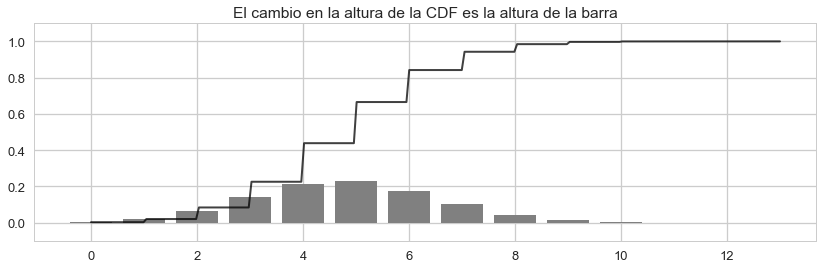

In [7]:
binomial = stats.binom(n=12, p=0.4)

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x, binomial.cdf(x), linewidth=2, color="black", alpha=0.75)
bars = ax.bar(range(12 + 1), [binomial.pmf(i) for i in range(12 + 1)], align="center", color="grey")
    
ax.set_ylim(-0.1, 1.1)
ax.set_title("El cambio en la altura de la CDF es la altura de la barra");

## Breviario de distribuciones discretas

El ser humano ha descubierto y catalogado muchísimas distribuciones destinadas a describir diversas situaciones que surgen en la ciencia y el análisis de datos.  Sería imposible enumerarlas todas aquí, así que nos limitaremos a las que

  - Se utilizarán en esta clase.
  - Surgirán comúnmente en el trabajo y la investigación de un científico de datos cotidiano.

In [8]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2.5):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend(frameon=True)
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()

### La distribución uniforme

La [Distribución Uniforme](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) es la distribución discreta más conocida.  Describe una situación con un número finito de resultados, donde cada resultado es tan probable como cualquier otro.  Por ejemplo, la tirada de un dado está distribuida uniformemente, con 6, o 10, o 12, o 20 resultados posibles, dependiendo del número de caras del dado.

![Dado](images/dice.jpeg)

La **función de densidad de probabilidad** de la distribución uniforme (discreta) es:

$$ f(k) = \frac{1}{\text{# de resultados}} $$

y la **función de distribución** es:

$$ F(k) = \frac{\text{# de resultados} \leq k}{\text{# de resultados}} $$

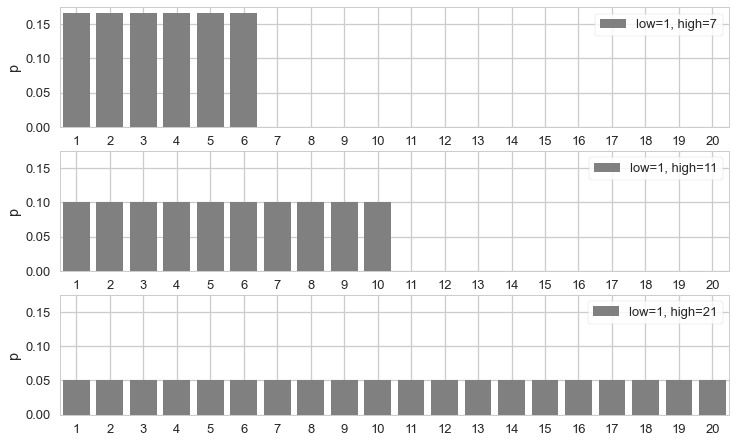

In [9]:
draw_pmf_grid(stats.randint, 
              param_names=('low', 'high'), 
              param_values=[(1, 7), (1, 11), (1, 21)],
              xpts=[x+1 for x in range(20)])

### La distribución Bernoulli

La [**Distribución de Bernoulli**](https://en.wikipedia.org/wiki/Bernoulli_distribution) es la distribución discreta más sencilla.  Es un modelo de un solo lanzamiento de una moneda, posiblemente cargada.

Precisamente, una variable aleatoria $X$ tiene una distribución Bernoulli si:

  - Sólo hay dos salidas posibles de $X$, tradicionalmente etiquetadas como $0$ y $1$.
  - Existe una probabilidad $p$ de que $X$ dé como resultado $1$.
  
La **función de densidad de probabilidad** de la distribución Bernoulli es:

$$  f(k) = \begin{cases}
      1-p, & \text{if}\ k=0 \\
      p, & \text{if}\ k=1
    \end{cases}
$$

Y la **función de distribución** de la distribución Bernoulli es

$$  F(k) = \begin{cases}
      0, & \text{for}\ k<0 \\
      1-p, & \text{for}\ 0 \le k<1 \\
      1, & \text{for}\ k \ge1 \\
    \end{cases}
$$

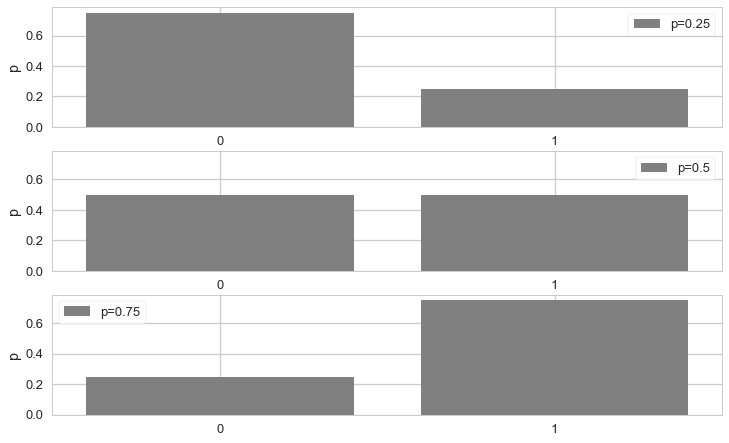

In [10]:
draw_pmf_grid(stats.bernoulli, 
              param_names='p', 
              param_values=[(0.25,), (0.5,), (0.75,)],
              xpts=[0, 1])

### Distribución Binomial

La [**Distribución Binomial**](https://en.wikipedia.org/wiki/Binomial_distribution) es otra distribución discreta común.  Es una distribución de **conteo** que modela el lanzamiento de una moneda (posiblemente cargada) un cierto número de veces, y cuenta cuántas veces la moneda sale cara.

La función de densidad de la probabilidad es

$$f(\text{k caras}) = {n \\conozco k} p^k (1-p)^{n-k} $$

Donde:

  - $n$ es el número de veces que se lanza la moneda.
  - $p$ es la probabilidad de que un solo lanzamiento resulte en cara.

Esto viene del hecho de que hay $\displaystyle {n \choose k}$ maneras en que las distribuciones Bernoulli subyacentes pueden tener valores de 1 o 0.

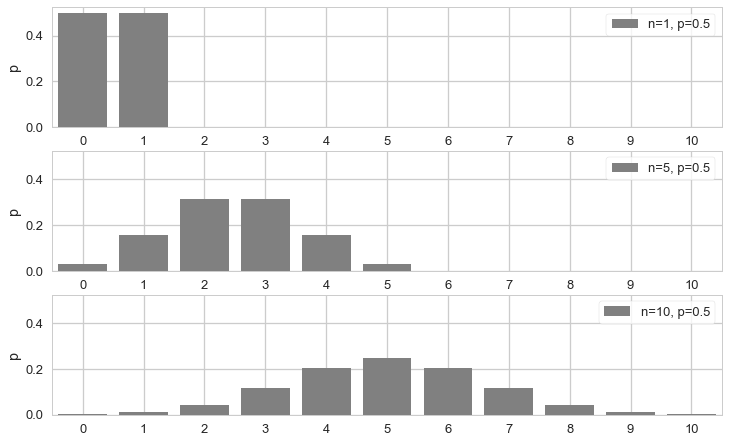

In [11]:
draw_pmf_grid(stats.binom, 
              param_names=('n', 'p'), 
              param_values=[(1, 0.5), (5, 0.5), (10, 0.5)], 
              xpts=range(0, 11))

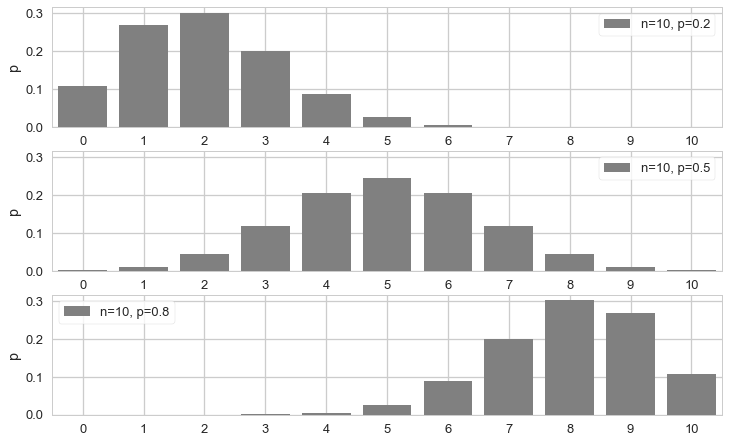

In [12]:
draw_pmf_grid(stats.binom, 
              param_names=('n', 'p'), 
              param_values=[(10, 0.2), (10, 0.5), (10, 0.8)], 
              xpts=range(0,11))

### La distribución hipergeométrica

La [**Distribución hipergeométrica**](https://en.wikipedia.org/wiki/Hypergeometric_distribution) es otra distribución de conteo.  Esta distribución se basa en un mazo de cartas de dos tipos (por ejemplo, rojas y azules).  Si se baraja el mazo, se saca un cierto número de cartas y se cuenta cuántas cartas azules se tienen, este recuento se distribuye hipergeométricamente.

$$f(\text{$k$ cartas azules}) = \displaystyle\frac{\displaystyle{K \choose k}{N-K \choose n-k}}{\displaystyle{N \choose n}}$$

Donde:

  - $N$ es el número total de cartas del mazo.
  - $K$ es el número total de cartas **azules** del mazo.
  - $n$ es el tamaño de la mano que has sacado.
  
La distribución hipergeométrica es bien conocida por cualquiera que juegue a juegos de cartas de alto nivel.

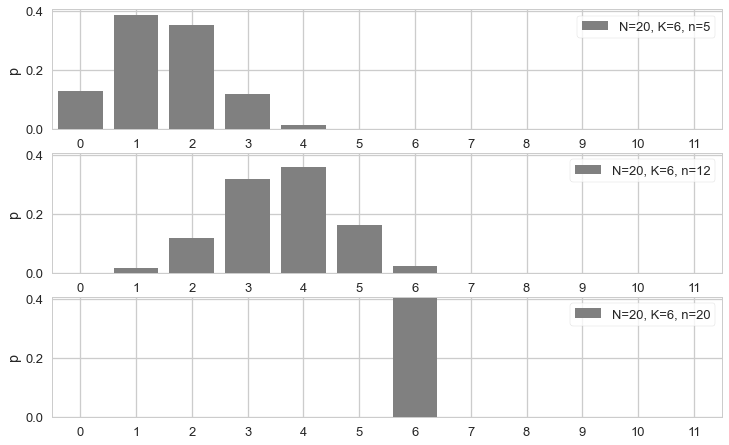

In [13]:
draw_pmf_grid(
    stats.hypergeom, 
    ('N', 'K', 'n'), 
    [(20, 6, 5), (20, 6, 12), (20, 6, 20)], 
    range(0, 12))

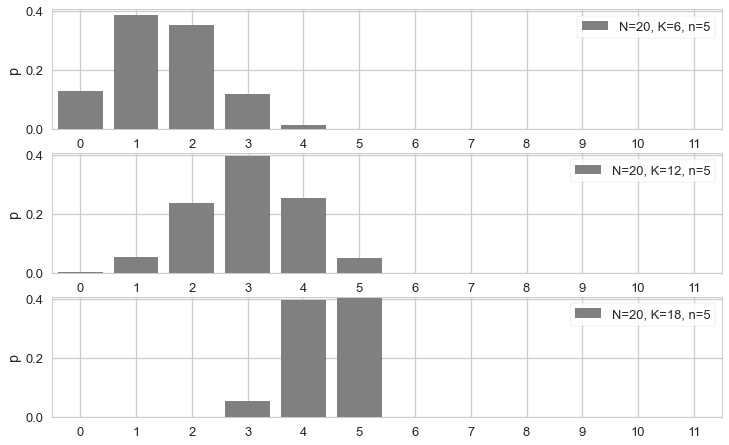

In [14]:
draw_pmf_grid(
    stats.hypergeom, 
    ('N', 'K', 'n'), 
    [(20, 6, 5), (20, 12, 5), (20, 18, 5)], 
    range(0, 12))

### La distribución de Poisson

La [**distribución de Poisson**](https://en.wikipedia.org/wiki/Poisson_distribution) es otra distribución de conteo.  

La distribución de Poisson modela un proceso en el que los eventos ocurren a una **tasa o frecuencia** fija, y se observa durante una cantidad de tiempo fija.  

Por ejemplo, el número de llamadas al 911 en una hora para una ciudad, o el número de autobuses que llegan a una parada en una hora, o el número de veces que me caigo de mi monopatín en una sesión de una hora, están todos (aproximadamente) distribuidos por Poisson.

La función de masa de probabilidad de la distribución de Poisson es

$$f(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Aquí:

  - $\lambda$ es la tasa a la que se producen los eventos (por ejemplo, 2 por hora, 6 por día, 122 por segundo, etc...).

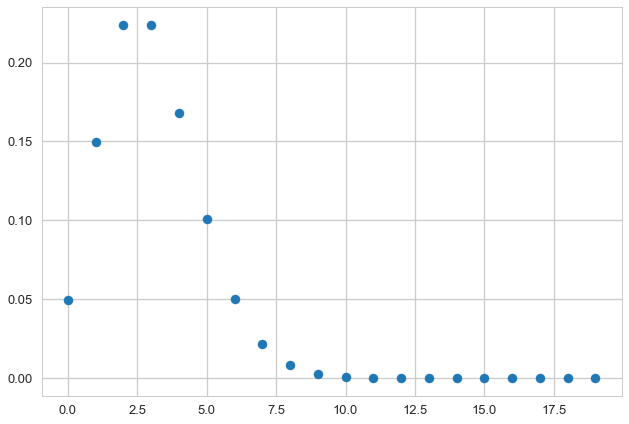

In [15]:
# demo plot Poisson distribution of 911 calls
k = np.array(range(0,20))
lambda_ = 3
plt.scatter(k, 
            lambda_**k*np.exp(-lambda_)/sp.special.factorial(k));

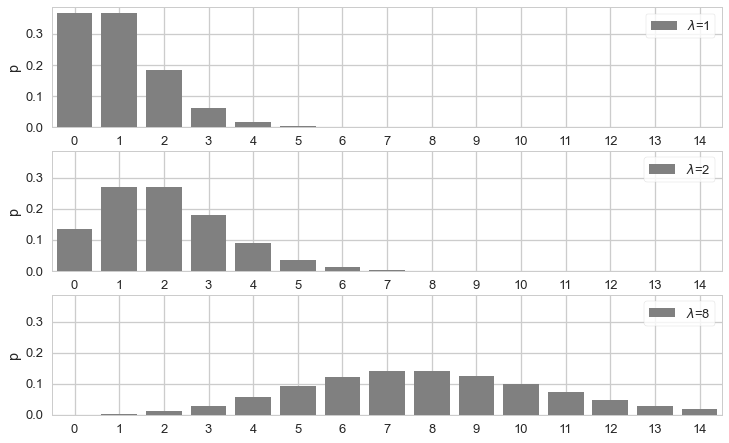

In [16]:
draw_pmf_grid(stats.poisson,
              param_names=(r'$\lambda$',), 
              param_values=[(1,), (2,), (8,)], 
              xpts=range(15))

### Caso Continuo: Distribución y Densidad

En el caso continuo, nuestra variable aleatoria puede arrojar **cualquier** valor (a veces dentro de un rango), por lo que el concepto de "sumar todas las probabilidades de las posibilidades" no tiene sentido.

Afortunadamente, la definición de la función de distribución es exactamente la misma que en el caso discreto:

$$ F_X(t) = P(X \leq t) $$

Ahora la **función de densidad de probabilidad** cambia, mientras que antes íbamos entre las dos "sumando probabilidades", ahora tenemos que utilizar un concepto de [cálculo](https://en.wikipedia.org/wiki/Calculus), e [integrar](https://en.wikipedia.org/wiki/Integral):

$$ F_X(t) = P(X \leq t) = \int_{- \infty}^{t} f_X(t) dt $$

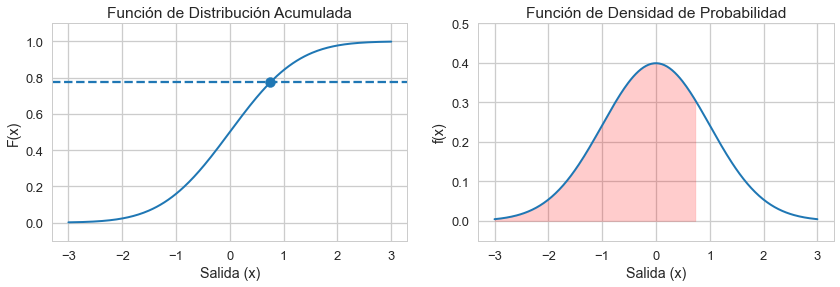

In [17]:
normal = stats.norm(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(0.75, normal.cdf(0.75), s=100)
ax[0].axhline(y=normal.cdf(0.75), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Función de Distribución Acumulada")
ax[0].set_xlabel("Salida (x)")
ax[0].set_ylabel("F(x)")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Función de Densidad de Probabilidad")
ax[1].set_xlabel("Salida (x)")
ax[1].set_ylabel("f(x)")
ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 0.75) ),
                   color="red", alpha=0.2)

La función de densidad **no** nos dice la probabilidad de que nuestra variable aleatoria asuma un valor específico, pero **si** nos dice la probabilidad de que la salida de la variable aleatoria caiga en un rango determinado.  De nuevo, esta conexión requiere integración:

$$P(a < X \leq b) = \int_{a}^{b} f_X(t) dt $$

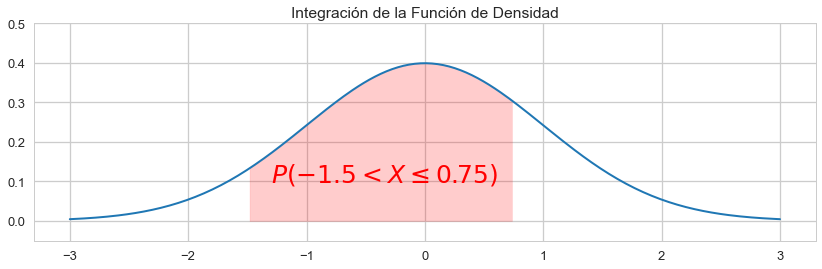

In [18]:
normal = stats.norm(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x, normal.pdf(x), linewidth=2)
ax.set_ylim(-0.05, 0.5)
ax.set_title("Integración de la Función de Densidad")
ax.fill_between(x, normal.pdf(x), 0, 
                where=( (x > -1.5) & (x <= 0.75) ),
                color="red", 
                alpha=0.2)
ax.text(-1.3, 0.10, r"$P(-1.5 < X \leq 0.75)$", color="red", fontsize=25);

#### Cuando queremos calcular las probabilidades de alguna cantidad aleatoria, se puede

  - Evaluar la función de distribución.
  - Integrar la función de densidad.
  
*Si no se dispone de las funciones de distribución o de densidad, entonces **no podemos calcular probabilidades sobre la variable aleatoria**.

## Breviario de Distribuciones Continuas

In [19]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''Dibujar una PDF'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''Dibujar varias PDFs'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Distribución Acumulada')
    axs[1].set_ylabel('Densidad de Probabilidad')
    axs[0].legend()
    axs[1].legend()

### Distribución Uniforme

También existe una versión continua de la [Distribución Uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_(continua)). Esta escribe un conjunto de resultados que son todos igual de probables, pero esta vez cualquier número de un intervalo es un posible resultado de la variable aleatoria.  Por ejemplo, la posición en la que cae una gota de lluvia en un segmento de línea (en una tormenta muy grande) está distribuida uniformemente.

LA **Función de Densidad de Probabilidad** de la distribución uniforme continua es:

$$ f(t) = \begin{cases}
    \displaystyle\frac{1}{b - a} & a < t \leq b \\
    0 & \text{De lo contrario}
\end{cases}
$$

y la **Función de Distribución** es:

$$ F(t) = \begin{cases}
    0 & t < a \\
    \displaystyle\frac{1}{b - a}(t - a) & a < t \leq b \\
    1 & t \geq b
\end{cases}
$$

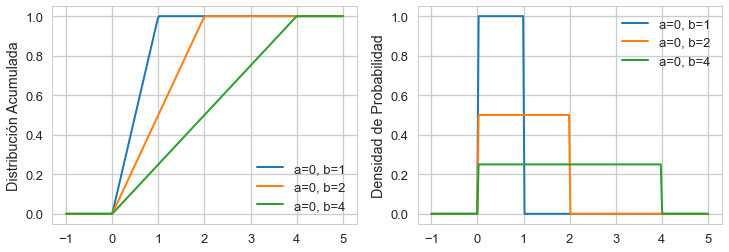

In [20]:
draw_continuous_distributions(stats.uniform, ("a", "b"), [(0,1),(0,2),(0,4)], -1, 5)

### La Distribución Normal

La [**Distribución Normal**](https://en.wikipedia.org/wiki/Normal_distribution) tiene una importancia primordial en la teoría de la probabilidad y la estadística debido al **[Teorema del Límite Central](https://en.wikipedia.org/wiki/Central_limit_theorem)** (del que hablaremos más adelante). 

La Función de Densidad de la Distribución Normal es:

$$f_Z(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\Bigl[{-\frac{(t - \mu)^2}{2 \sigma}}\Bigr]$$

Su forma es la característica campana de Gauss.

La función de distribución de la distribución normal no tiene una [forma cerrada](https://en.wikipedia.org/wiki/Closed-form_expression), lo mejor que podemos hacer es representarla como una integral:

$$ F_Z(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \int_{- \infty}^{x} \exp\Bigl[{-\frac{(t - \mu)^2}{2 \sigma}}\Bigr]dt $$

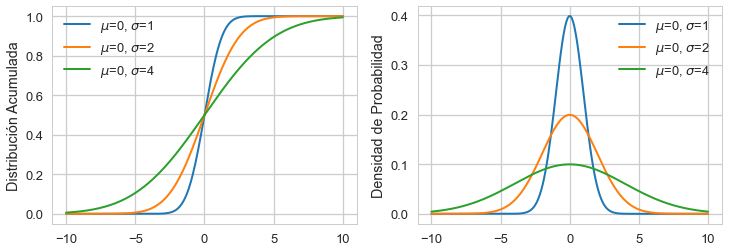

In [21]:
draw_continuous_distributions(stats.norm, (r"$\mu$", r"$\sigma$"), [(0,1),(0,2),(0,4)], -10, 10)

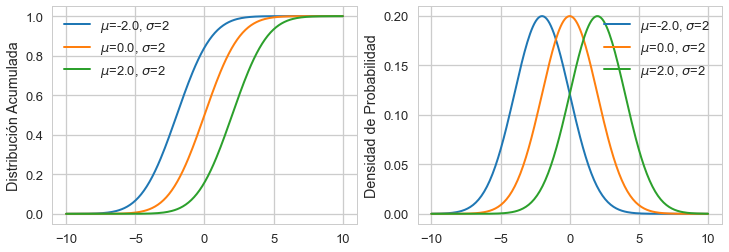

In [22]:
draw_continuous_distributions(stats.norm, (r"$\mu$", r"$\sigma$"), [(-2.0, 2), (0.0, 2), (2.0, 2)], -10, 10)

### Distribución Exponencial

La [**Distribución exponencial**](https://en.wikipedia.org/wiki/Exponential_distribution) es una distribución continua relacionada con la distribución de Poisson.  Mientras que la distribución de Poisson describe cuántos sucesos se observarán si los sucesos ocurren a un ritmo específico y se observan durante una cantidad específica de tiempo, la distribución exponencial modela la **cantidad de tiempo** que se tendrá que observar hasta que se observe el primer suceso.

Por ejemplo, la cantidad de tiempo que tienes que esperar en una parada de autobús hasta que llegue un autobús, y la cantidad de espacio que tienes que buscar antes de encontrar un objeto caído tienden a distribuirse exponencialmente.

La **Función de Densidad de Probabilidad** de esta distribución es:

$$f(t) = \frac{1}{\theta} \exp\Bigl({-\frac{t}{\theta}}\Bigr) $$

Su **Función de Distribución** es:

$$ F(x) = 1 - \exp\Bigl({-\frac{t}{\theta}}\Bigr)$$

Donde:

  - $\theta$ es el recíproco de la tasa a la que ocirren los eventos.
  
Comúnmente se parametriza la distribución exponencial por medio de $\lambda = \displaystyle\frac{1}{\theta}$, i.e.

$$f(t) = \lambda \exp\Bigl({-\lambda t}\Bigr) $$ 

y

$$ F(x) = 1 - \exp\Bigl({-\lambda t}\Bigr)$$

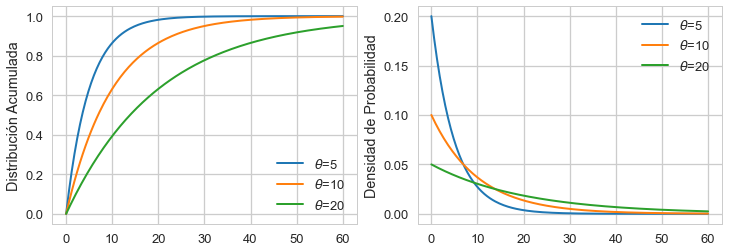

In [23]:
draw_continuous_distributions(stats.expon, (None, r"$\theta$"), [(0,5),(0,10),(0,20)], 0, 60)

### Distribución Gamma

La [**Distribución Gamma**](https://en.wikipedia.org/wiki/Gamma_distribution) es una forma más general de la distribución exponencial.  

La distribución Gamma describe la cantidad de tiempo que hay que esperar hasta que se observe la ocurrencia de un **número determinado de eventos** (en lugar de un solo evento en el caso de la exponencial).

La **Función de Densidad de Probabilidad** de esta distribución es:

$$f(t) = \frac{1}{(k-1)! \theta^k} t^{k-1}\exp\Bigl({-\frac{t}{\theta}}\Bigr)$$

Al igual que en la distribución normal, no existe una forma cerrada para la distribución Gamma.

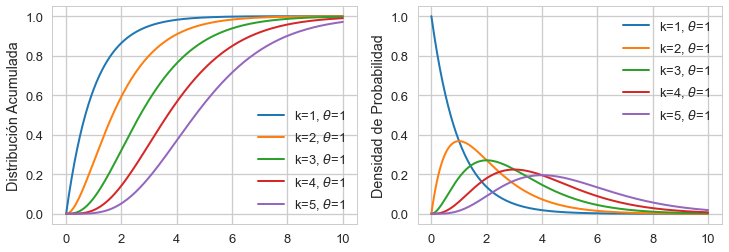

In [24]:
draw_continuous_distributions(stats.gamma, ("k", None, r"$\theta$"), [(1,0,1),(2,0,1),(3,0,1),(4,0,1),(5,0,1)], 0, 10)

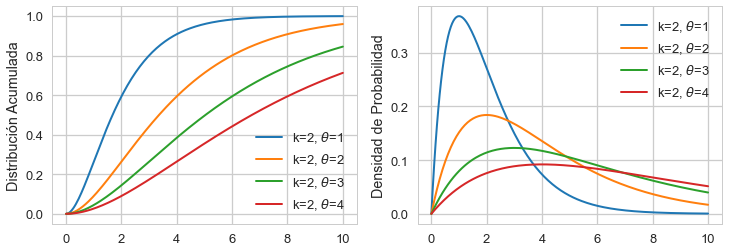

In [25]:
draw_continuous_distributions(stats.gamma, ("k", None, r"$\theta$"), [(2,0,1),(2,0,2),(2,0,3),(2,0,4)], 0, 10)

## Distribuciones en Scipy

La principal herramienta para trabajar con distribuciones en python es `scipy.stats`.  Desafortunadamente, el diseño de la interfaz en `scipy.stats` es poco amigable.  Los nombres de los parámetros no son estándar, y los nombres de algunos de los métodos tampoco son amigables.

#### Creación de un objeto de distribución

In [26]:
import scipy.stats as stats

# Distribuciones discretas
uniform_disc = stats.randint(low=0, high=10) # k = 0, 1, ..., 9
bernoulli = stats.bernoulli(p=0.4)
binomial = stats.binom(n=50, p=0.4)
hypergeom = stats.hypergeom(M=20, n=7, N=12) 
poisson = stats.poisson(mu=5) # mu es lo mismo que lambda


# Distribuciones continuas
uniform_cont = stats.uniform(loc=0, scale=10) 
normal = stats.norm(loc=0.0, scale=1.0) 
exponental = stats.expon(loc=2.0) 

#### Evaluando la CDF

In [24]:
print("P(Binomial(n=50, p=0.4) <= 20) = ", binomial.cdf(20))
print("P(Normal(mu=0.0, sigma=1.0) <= 1.0 = ", normal.cdf(1.0))

P(Binomial(n=50, p=0.4) <= 20) =  0.5610349320400663
P(Normal(mu=0.0, sigma=1.0) <= 1.0 =  0.8413447460685429


#### Evaluando la PMF

In [25]:
print("P(Binom(n=50, p=0.4) == 20) = ", binomial.pmf(20))
print("P(Poisson(lambda=5) == 7) = ", poisson.pmf(7))

P(Binom(n=50, p=0.4) == 20) =  0.11455855282952411
P(Poisson(lambda=5) == 7) =  0.10444486295705395


Evaluar la PDF no tiene realmente ningún significado, así que lo dejaremos.  Es útil sobre todo para el trazado.

#### Muestra de Números Aleatorios

La instrucción `rvs` (Random ValueS) toma muestras a partir de un objeto de distribución.

In [27]:
print("Diez valores aleatorios binomiales(n=50, p=0.4): ", binomial.rvs(10))
print("Diez valores aleatorios normales(mu=0.0, sigma=1.0): ", normal.rvs(10))

Diez valores aleatorios binomiales(n=50, p=0.4):  [20 14 21 18 21 21 19 22 21 25]
Diez valores aleatorios normales(mu=0.0, sigma=1.0):  [-0.01965792 -1.13919639  1.97635224 -0.19766505  0.57750087  1.65049078
 -0.94776016  1.11812905 -1.61305578  1.05215936]


## Teoría de Probabilidad

Resumen:

  - Siempre que tenemos una cantidad que es aleatoria, el objeto matemático que utilizamos para describirla se llama **variable aleatoria**.
  - Describimos el patrón de aleatoriedad de una variable aleatoria mediante una **distribución**.  Las distribuciones pueden describirse mediante su **función de distribución**, o su **función de densidad**.

### Distribución Idéntica

Si dos variables aleatorias tienen la **misma** función de distribución, decimos que están **idénticamente distribuidas**, y denotamos esta relación notativamente por:

$$ X \sim Y $$

En la práctica, esto significa que **cualquier afirmación probabilística que hagamos sobre $X$ y $Y$ individualmente tiene la misma respuesta**.

Así que, por ejemplo, si $X \sim Y$, entonces:

$$ P(X < \pi) = P(Y < \pi) $$
$$ P(\sin(X) > 0.5) = P(\sin(Y) > 0.5) $$

Etc...

### Independencia

Mientras que la distribución idéntica se refiere a cómo se comportan dos variables aleatorias individualmente, la independencia se refiere al efecto (o la falta de éste) que una tiene sobre la otra.

Por ejemplo, si

$$ X = \text{# de accidentes de auto que han tenido en su vida} $$
$$ Y = \text{Costo total del seguro pagado por mes} $$

entonces $X$ e $Y$ son cantidades aleatorias (donde la aleatoriedad surge porque no he dicho a quién se refiere "ellos".  Obviamente, estas dos cantidades aleatorias están *relacionadas*, los individuos con más accidentes pagan más en el seguro.  Así que saber algo sobre $X$ para un individuo te da **información** sobre los posibles valores de $Y$.  Esto se llama **dependencia**.

**La **independencia** se da cuando el conocimiento del valor de $X$ no dice nada sobre $Y$.

Formalmente, la independencia dice que las probabilidades se multiplican.  Dos variables aleatorias son **independientes** cuando lo siguiente es siempre cierto:

$$ P(a_1 < X \leq b_1 \ \text{y} \ a_2 < Y \leq b_2) = P(a_1 < X < b_1) \times P(a_2 < Y \leq b_2) $$

La independencia es un concepto muy importante en probabilidad y estadística.